In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  #this is for creating model to predict the price
from sklearn.model_selection import train_test_split #for train test split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #metrics for evaluation of the model

In [2]:
df = pd.read_csv('Ice Cream Sales - temperatures.csv')
df.sample(10)

,Temperature,Ice Cream Profits
176,73,52.13
226,77,57.52
196,74,54.26
283,83,62.58
355,96,80.02
330,89,71.51
279,82,64.86
137,68,46.90
40,54,29.75
364,101,85.02


In [3]:
df.shape

(365, 2)

In [4]:
df.duplicated().sum()

1

In [5]:
df.isnull().sum()

Temperature          0
Ice Cream Profits    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


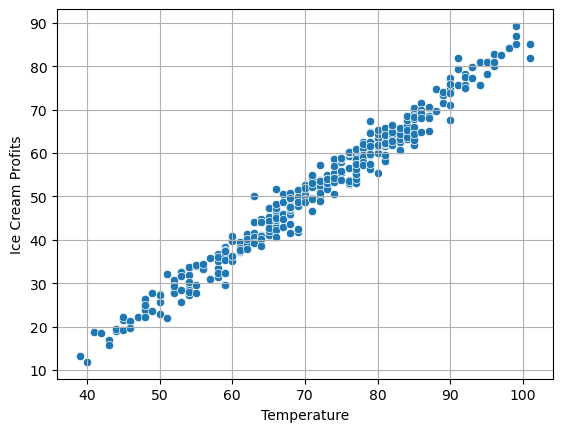

In [30]:
sns.scatterplot(x=df['Temperature'], y=df['Ice Cream Profits'])
plt.grid()

In [29]:
coef = df.corr()
print(coef)

                   Temperature  Ice Cream Profits
Temperature           1.000000           0.988446
Ice Cream Profits     0.988446           1.000000


In [9]:
df.describe()

,Temperature,Ice Cream Profits
count,365.000000,365.000000
mean,71.980822,52.103616
std,13.258510,15.989004
min,39.000000,11.880000
25%,63.000000,40.650000
50%,73.000000,53.620000
75%,82.000000,63.630000
max,101.000000,89.290000


#### From the corelation value we can observe that the datas are strongly linearly related

C:\Users\91833\AppData\Local\Temp\ipykernel_9848\3873811000.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'], bins=10, hist=False)
C:\Users\91833\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temperature', ylabel='Density'>

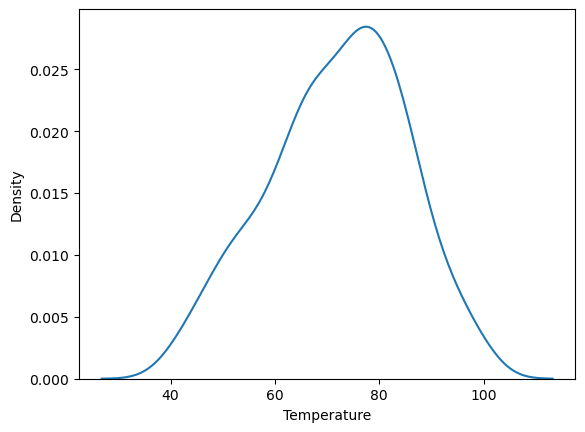

In [10]:
sns.distplot(df['Temperature'], bins=10, hist=False)

C:\Users\91833\AppData\Local\Temp\ipykernel_9848\1098387848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ice Cream Profits'], bins=100, hist=False)
C:\Users\91833\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ice Cream Profits', ylabel='Density'>

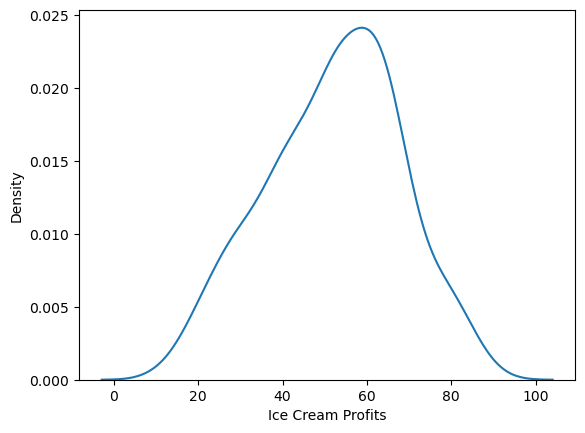

In [11]:
sns.distplot(df['Ice Cream Profits'], bins=100, hist=False)

### MODEL TRAINING

In [12]:
#Seperate out the input and the output column

ip = df.loc[:,'Temperature'] #integer
op = df.loc[:, 'Ice Cream Profits'] #float

In [13]:
type(ip) #we got a series data 

pandas.core.series.Series

In [14]:
ip=ip.to_numpy().reshape(-1,1)
op=op.to_numpy().reshape(-1,1)

ip = pd.Series(ip.flatten())  # Use flatten() to convert 2D array to 1D
op = pd.Series(op.flatten())

#### We are applying linear regression here which is a form of supervised learning hence we have an output for each of the input columns
#### hence we train the model on both output and input column simultaneously 
#### Now we have to split the data randomly to test and train the data this is done so that we can test the models performance on some new values

In [15]:
#splitting the dataset
ip_train,ip_test,op_train,op_test = train_test_split(ip,op,test_size=0.2,random_state=20) 
# order in which the variables names are written are to be maintained 
# since the splitting is done on a single column at first training data is generated then testing data is generated.

In [16]:
#creating the model
lr = LinearRegression()

In [17]:
lr.fit(ip_train,op_train)

LinearRegression()

In [18]:
ip_test = pd.Series(ip.flatten())  # Use flatten() to convert 2D array to 1D with indexes
op_test = pd.Series(op.flatten())



In [19]:
ip_test[30]

52

In [20]:
op_test[30]

28.05

In [21]:
#predicting the result on the whole test dataset of 2d shape 
op_pred = lr.predict(ip_test.values.reshape(-1,1))
#print(op_pred)

In [22]:
r2 = r2_score(op_test,op_pred)
print(r2)
#r2 is 97.69 percent hence the predicted data is predicted with almost 98 percent accuracy 

0.9769776887958528


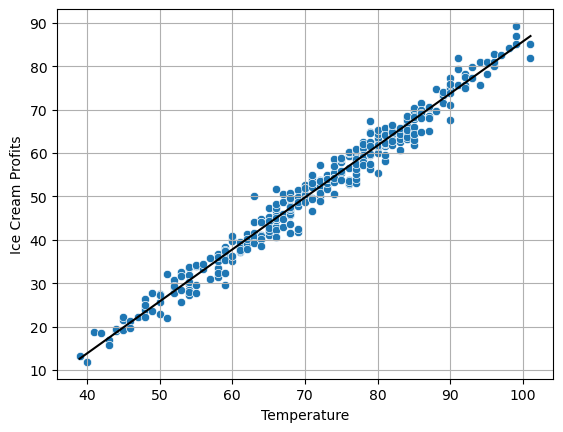

In [23]:
#plotting the linear regression line
sns.scatterplot(x=df['Temperature'], y=df['Ice Cream Profits'])
plt.plot(ip_test,op_pred, color='black', label='Regression Line')
plt.grid(True)

In [24]:
lr.coef_ #value of the slope

array([[1.19913736]])

In [25]:
lr.intercept_ #value of the intercept

array([-34.15524001])

In [26]:
lr.rank_

1

In [27]:
#make_regression function creates a dataset for regression analysis